# Criando Nomes

In [318]:
import pandas as pd

In [319]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [320]:
print(f"Quatidade de nomes: {len(nomes_m) + len(nomes_f)}")


Quatidade de nomes: 400


In [321]:
frames = [nomes_f, nomes_m]

In [322]:
nomes = pd.concat(frames)['nome'].to_frame()

In [323]:
nomes.index = range(nomes.shape[0])

In [324]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
395,WALTER
396,ARLINDO
397,MICHAEL
398,ALVARO


# Incluid ID dos alunos

In [325]:
import numpy as np
np.random.seed(123)

In [326]:
total_alunos = len(nomes)

In [327]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [328]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
203,FRANCISCO,382
382,CHARLES,33
230,ANDERSON,111


In [329]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [330]:
nomes.sample(5)

,nome,id_aluno,dominio
284,SEVERINO,78,@dominioemail.com.br
200,JOSE,331,@servicodoemail.com
379,IAGO,340,@dominioemail.com.br
10,SANDRA,174,@dominioemail.com.br
171,TERESINHA,45,@dominioemail.com.br


In [331]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [332]:
nomes.sample(5)

,nome,id_aluno,dominio,email
314,ARTHUR,320,@dominioemail.com.br,arthur@dominioemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominioemail.com.br,helena@dominioemail.com.br
183,IRACI,8,@dominioemail.com.br,iraci@dominioemail.com.br
189,DALVA,137,@dominioemail.com.br,dalva@dominioemail.com.br


# Criando a tabela Cursos

In [333]:
!pip3 install html5lib
!pip3 install lxml

In [334]:
import html5lib

In [335]:
url = 'https://tabela-cursos.herokuapp.com/index.html'

In [336]:
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [337]:
type(cursos)

list

In [338]:
cursos = cursos[0]

In [339]:
type(cursos)

pandas.core.frame.DataFrame

In [340]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando index cursos

In [341]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [342]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [343]:
cursos['id'] = cursos.index + 1

In [344]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [345]:
cursos.set_index('id', inplace = True)

In [346]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [347]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominioemail.com.br,isabel@dominioemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
330,JUNIOR,184,@dominioemail.com.br,junior@dominioemail.com.br
270,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
371,VALDEMIR,3,@dominioemail.com.br,valdemir@dominioemail.com.br


# Matriculando alunos nos cursos

In [348]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [349]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
333,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominioemail.com.br,rafaela@dominioemail.com.br,1
245,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominioemail.com.br,pamela@dominioemail.com.br,1


In [350]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [351]:
import seaborn as sns

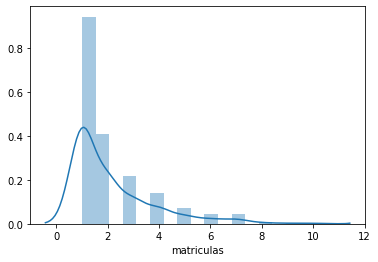

In [352]:
sns.distplot(nomes.matriculas)

In [353]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

In [354]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
370,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
397,MICHAEL,323,@dominioemail.com.br,michael@dominioemail.com.br,2
396,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominioemail.com.br,neusa@dominioemail.com.br,2


# Selecionando cursos

In [355]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominioemail.com.br,cristiane@dominioemail.com.br,1
154,NICOLE,182,@dominioemail.com.br,nicole@dominioemail.com.br,2
191,TERESA,264,@dominioemail.com.br,teresa@dominioemail.com.br,1
132,GABRIELE,72,@dominioemail.com.br,gabriele@dominioemail.com.br,2
110,LUCIENE,22,@dominioemail.com.br,luciene@dominioemail.com.br,2


In [356]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [357]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])


In [358]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19


In [359]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python
6,17,PHP com MySql
7,56,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [360]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominioemail.com.br,maria@dominioemail.com.br,2
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,4
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominioemail.com.br,antonia@dominioemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [361]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [362]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19


In [363]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_alunos'})

In [364]:
matriculas_por_curso.head()

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python


# Saída em diferentes formatos

In [365]:
matriculas_por_curso.head()

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python


In [366]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [367]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_alunos,nome_do_curso
0,62,Lógica de programação
1,52,Java para Web
2,25,C# para Web
3,33,Ruby on Rails
4,59,Cursos de Python
5,17,PHP com MySql
6,56,.NET para web
7,37,Novas integrações com Java
8,70,TDD com Java
9,12,Código limpo com C#


In [368]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_alunos":{"1":62,"2":52,"3":25,"4":33,"5":59,"6":17,"7":56,"8":37,"9":70,"10":12,"11":81,"12":22,"13":52,"14":31,"15":82,"16":16,"17":44,"18":23,"19":67,"20":18},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [369]:
matriculas_html = matriculas_por_curso.to_html()

In [370]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>62</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>52</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>25</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>33</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>59</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>17</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>56</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>37</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>70</td>
   

# Criando banco sql

In [371]:
!pip install sqlalchemy

In [372]:
from sqlalchemy import create_engine, MetaData, Table

In [373]:
engine = create_engine('sqlite:///:memory:')

In [374]:
engine

Engine(sqlite:///:memory:)

In [375]:
type(engine)

sqlalchemy.engine.base.Engine

In [376]:
matriculas_por_curso.head(3)

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web


In [377]:
matriculas_por_curso.to_sql('matriculas', engine)

In [378]:
print(engine.table_names())

['matriculas']


# Buscando do banco sql

In [379]:
query = 'select * from matriculas where quantidade_alunos < 20'

In [380]:
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,6,17,PHP com MySql
1,10,12,Código limpo com C#
2,16,16,Estatística básica
3,20,18,Orientação objetos com Java


In [381]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

,nome_do_curso,quantidade_alunos
0,Lógica de programação,62
1,Java para Web,52
2,C# para Web,25
3,Ruby on Rails,33
4,Cursos de Python,59
5,PHP com MySql,17
6,.NET para web,56
7,Novas integrações com Java,37
8,TDD com Java,70
9,Código limpo com C#,12


In [382]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

In [383]:
muitas_matriculas = muitas_matriculas.query('quantidade_alunos > 90')

In [384]:
muitas_matriculas

,nome_do_curso,quantidade_alunos


# Escrevendo no banco

In [385]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [386]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos da próxima turma

In [387]:
matriculas_por_curso.head(20)

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python
6,17,PHP com MySql
7,56,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [388]:
matriculas

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19
...,...,...
854,383,19
855,366,2
856,366,15
857,366,6


In [389]:
id_curso = 19
proxima_turma = matriculas.query(f"id_curso == {id_curso}")
proxima_turma

,id_aluno,id_curso
0,235,19
1,235,19
4,43,19
13,55,19
33,163,19
...,...,...
802,85,19
815,209,19
852,323,19
853,323,19


In [390]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
167,TAINARA,128,@servicodoemail.com,tainara@servicodoemail.com,2
141,NEIDE,325,@dominioemail.com.br,neide@dominioemail.com.br,1
288,GILMAR,142,@servicodoemail.com,gilmar@servicodoemail.com,1


In [391]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
4,19,MOISES,@servicodoemail.com,moises@servicodoemail.com,3
8,19,IRACI,@dominioemail.com.br,iraci@dominioemail.com.br,1
14,19,SUELI,@dominioemail.com.br,sueli@dominioemail.com.br,6
19,19,VALMIR,@dominioemail.com.br,valmir@dominioemail.com.br,2
25,19,DANIELE,@dominioemail.com.br,daniele@dominioemail.com.br,4
...,...,...,...,...,...
351,19,EMANUEL,@servicodoemail.com,emanuel@servicodoemail.com,7
351,19,EMANUEL,@servicodoemail.com,emanuel@servicodoemail.com,7
381,19,CRISTINA,@dominioemail.com.br,cristina@dominioemail.com.br,7


In [392]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
4        MOISES
8         IRACI
14        SUELI
19       VALMIR
25      DANIELE
         ...   
351     EMANUEL
351     EMANUEL
381    CRISTINA
383      ALVARO
386      YASMIN
Name: nome, Length: 67, dtype: object

In [393]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
4,MOISES
8,IRACI
14,SUELI
19,VALMIR
25,DANIELE
...,...
351,EMANUEL
351,EMANUEL
381,CRISTINA


In [394]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Boas práticas em Java
Name: 19, dtype: object

In [395]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Boas práticas em Java'

In [396]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [397]:
proxima_turma

,nome
id_aluno,
4,MOISES
8,IRACI
14,SUELI
19,VALMIR
25,DANIELE
...,...
351,EMANUEL
351,EMANUEL
381,CRISTINA


In [398]:
proxima_turma.rename(columns = {'nome' : f'Alunos do curso: {nome_curso}'}, inplace=True)

In [399]:
proxima_turma.sample(5)

,Alunos do curso: Boas práticas em Java
id_aluno,
157,LEILA
162,RAFAEL
80,VITORIA
320,ARTHUR
334,JANETE


# Excel

In [400]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [401]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso: Boas práticas em Java
0,MOISES
1,IRACI
2,SUELI
3,VALMIR
4,DANIELE
...,...
62,EMANUEL
63,EMANUEL
64,CRISTINA
65,ALVARO
